In [2]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/louisrafter/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
### What are we going to do?
###text preprocessing
# remove stop words
#######spacy
#######tfidf
#######word2vec
###summarizing
#######N-Grams
#######sentiment analysis
###transforming
#######

In [4]:
# Load the datasets into pandas dataframes
review_lowes1 = pd.read_csv('review_lowes1.csv')
review_lowes2 = pd.read_csv('review_lowes2.csv')
review_lowes3 = pd.read_csv('review_lowes3.csv')
review_lowes4 = pd.read_csv('review_lowes4.csv')
review_lowes5 = pd.read_csv('review_lowes5.csv')

In [5]:
# Combine all the datasets into one dataframe
reviews = pd.concat([review_lowes1, review_lowes2, review_lowes3, review_lowes4, review_lowes5])

# Analyze the Data

In [217]:
import streamlit as st

In [6]:
#lets see the columns

print(reviews.columns)

Index(['Market_place', 'URL', 'Product_name', 'SKU', 'Price', 'Currency',
       'Total_stars_ranking', 'Subject', 'Author', 'Date', 'Review', 'Stars',
       'like', 'dislike'],
      dtype='object')


In [8]:
#lets see any null values

reviews[reviews['Review'].isna()]

,Market_place,URL,Product_name,SKU,Price,Currency,Total_stars_ranking,Subject,Author,Date,Review,Stars,like,dislike
56,lowes.com,https://www.lowes.com/pd/Mansfield-Summit-Whit...,Mansfield Summit White Elongated Chair Height ...,Model #5384CTK,209.0,USD,4.0,NaN,NaN,"March 13, 2022",NaN,4,1,0
77,lowes.com,https://www.lowes.com/pd/Mansfield-Summit-Whit...,Mansfield Summit White Elongated Chair Height ...,Model #5384CTK,209.0,USD,4.0,NaN,NaN,"April 25, 2023",NaN,5,0,0
81,lowes.com,https://www.lowes.com/pd/Mansfield-Summit-Whit...,Mansfield Summit White Elongated Chair Height ...,Model #5384CTK,209.0,USD,4.0,NaN,NaN,"July 30, 2021",NaN,5,1,2
82,lowes.com,https://www.lowes.com/pd/Mansfield-Summit-Whit...,Mansfield Summit White Elongated Chair Height ...,Model #5384CTK,209.0,USD,4.0,NaN,Paper,"June 23, 2021",NaN,5,1,2
89,lowes.com,https://www.lowes.com/pd/Mansfield-Summit-Whit...,Mansfield Summit White Elongated Chair Height ...,Model #5384CTK,209.0,USD,4.0,NaN,NaN,"November 13, 2021",NaN,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,lowes.com,https://www.lowes.com/pd/Mansfield-Summit-Whit...,Mansfield Summit White Elongated Chair Height ...,Model #5385CTK,239.0,USD,3.8,NaN,Martín,"June 10, 2022",NaN,5,0,0
58,lowes.com,https://www.lowes.com/pd/Mansfield-Summit-Whit...,Mansfield Summit White Elongated Chair Height ...,Model #5385CTK,239.0,USD,3.8,NaN,NaN,"October 13, 2022",NaN,3,0,0
32,lowes.com,https://www.lowes.com/pd/Mansfield/5003328827,Mansfield Vanquish 2 White Elongated Chair Hei...,Model #5997CTK,249.0,USD,3.7,NaN,John,"January 5, 2023",NaN,1,1,2
33,lowes.com,https://www.lowes.com/pd/Mansfield/5003328827,Mansfield Vanquish 2 White Elongated Chair Hei...,Model #5997CTK,249.0,USD,3.7,NaN,NaN,"November 25, 2022",NaN,3,1,2


In [220]:
#let's count the number of reviews per product
# Set the display options to show the full text for each row
pd.set_option('display.max_colwidth', None)

reviews_per_product = reviews.groupby('Product_name')['Review'].count().reset_index(name='num_reviews')
reviews_per_product

,Product_name,num_reviews
0,Mansfield Denali White Elongated Chair Height 2-piece WaterSense Toilet 12-in Rough-In (ADA Compliant),83
1,Mansfield Pro-Fit White Round Standard Height 2-piece WaterSense Toilet 12-in Rough-In,116
2,Mansfield Summit White Elongated Chair Height 2-piece WaterSense Toilet 10-in Rough-In (ADA Compliant),34
3,Mansfield Summit White Elongated Chair Height 2-piece WaterSense Toilet 12-in Rough-In (ADA Compliant),111
4,Mansfield Vanquish 2 White Elongated Chair Height 2-piece WaterSense Toilet 12-in Rough-In (ADA Compliant),36


In [221]:
#what is the average rating for each product?
# Set the display options to show the full text for each row
pd.set_option('display.max_colwidth', None)

average_rating_per_product = reviews.groupby('Product_name')['Stars'].mean().reset_index(name='avg_rating')
average_rating_per_product

,Product_name,avg_rating
0,Mansfield Denali White Elongated Chair Height 2-piece WaterSense Toilet 12-in Rough-In (ADA Compliant),3.819277
1,Mansfield Pro-Fit White Round Standard Height 2-piece WaterSense Toilet 12-in Rough-In,3.551724
2,Mansfield Summit White Elongated Chair Height 2-piece WaterSense Toilet 10-in Rough-In (ADA Compliant),3.382353
3,Mansfield Summit White Elongated Chair Height 2-piece WaterSense Toilet 12-in Rough-In (ADA Compliant),3.513514
4,Mansfield Vanquish 2 White Elongated Chair Height 2-piece WaterSense Toilet 12-in Rough-In (ADA Compliant),3.833333


In [25]:
#let's remove stopwords and perform lemmatization on the reviews to reduce noise and standardize the text

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

reviews.dropna(subset=['Review'], inplace=True) 
reviews['cleaned_review'] = reviews['Review'].apply(lambda x: clean_text(x))
reviews['cleaned_review'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/louisrafter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/louisrafter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/louisrafter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    install went mostly according plan however bol...
1    easy install make sure someone help carry box ...
2    first thing want say ever stayed hotel used to...
3    got toilet thinking different getting installe...
4    toilet toilet pretty much good thing toilet po...
Name: cleaned_review, dtype: object

In [28]:
#what are the most common words in the reviews?

from collections import Counter

word_counter = Counter(" ".join(reviews['cleaned_review']).split()).most_common(20)
word_counter

[('toilet', 584),
 ('tank', 218),
 ('flush', 213),
 ('seat', 147),
 ('one', 144),
 ('bolt', 142),
 ('install', 122),
 ('water', 120),
 ('bowl', 112),
 ('installed', 107),
 ('easy', 106),
 ('good', 88),
 ('would', 83),
 ('well', 79),
 ('like', 73),
 ('new', 71),
 ('get', 71),
 ('made', 68),
 ('time', 65),
 ('great', 64)]

In [ ]:
#notice that Install and Installed are two popular words, maybe we should use a more advanced stemming tool?

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [stemmer.stem(token) for token in tokens]
    # Remove consecutive duplicate words
    tokens = [tokens[i] for i in range(len(tokens)) if i == 0 or tokens[i] != tokens[i-1]]
    return ' '.join(tokens)


reviews.dropna(subset=['Review'], inplace=True) 
reviews['cleaned_review'] = reviews['Review'].apply(lambda x: clean_text(x))
reviews['cleaned_review'].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/louisrafter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/louisrafter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/louisrafter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    instal went mostli accord plan howev bolt secu...
1    easi instal make sure someon help carri box ar...
2    first thing want say ever stay hotel use toile...
3    got toilet think differ get instal appar bette...
4    toilet pretti much good thing toilet power flu...
Name: cleaned_review, dtype: object

In [158]:
#what are the most common words in the reviews?

from collections import Counter

word_counter = Counter(" ".join(reviews['cleaned_review']).split()).most_common(20)
word_counter

[('toilet', 576),
 ('instal', 310),
 ('flush', 247),
 ('tank', 217),
 ('seat', 149),
 ('bolt', 144),
 ('one', 143),
 ('leak', 124),
 ('water', 119),
 ('bowl', 112),
 ('easi', 105),
 ('replac', 97),
 ('need', 97),
 ('good', 88),
 ('like', 85),
 ('get', 84),
 ('would', 83),
 ('well', 79),
 ('use', 75),
 ('look', 72)]

In [8]:
# Save the DataFrame as a CSV file
reviews.to_csv('cleaned_review.csv', index=False)

# WORD2VEC

In [32]:
#maybe we can implement word2vec?

import gensim.downloader as api

# Load pre-trained Word2Vec model
model = api.load('word2vec-google-news-300')

# Tokenize and clean review data
cleaned_reviews = reviews['Review'].apply(lambda x: clean_text(x))

# Convert cleaned reviews to vectors using Word2Vec model
vectors = cleaned_reviews.apply(lambda x: np.mean([model[word] for word in x.split() if word in model], axis=0))


In [33]:
print(vectors)

0     [0.018209353, 0.038576566, -0.025678195, 0.016...
1     [-0.022939773, 0.072490565, -0.054186866, 0.04...
2     [0.009653385, 0.03910241, 0.0015779642, 0.0453...
3     [0.02318856, 0.077619806, -0.020930989, 0.0688...
4     [0.07197029, 0.07742408, -0.046142086, 0.04736...
                            ...                        
31    [0.03060913, 0.014851888, -0.06490072, -0.0133...
34    [0.011497921, 0.025620354, -0.0034179688, 0.05...
35    [0.04450402, 0.09209736, -0.049431436, -0.0366...
36    [-0.014058431, 0.12719727, 0.05834961, -0.0278...
37    [0.023297992, -0.013469151, -0.018101284, 0.11...
Name: Review, Length: 380, dtype: object


/Users/louisrafter/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/louisrafter/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


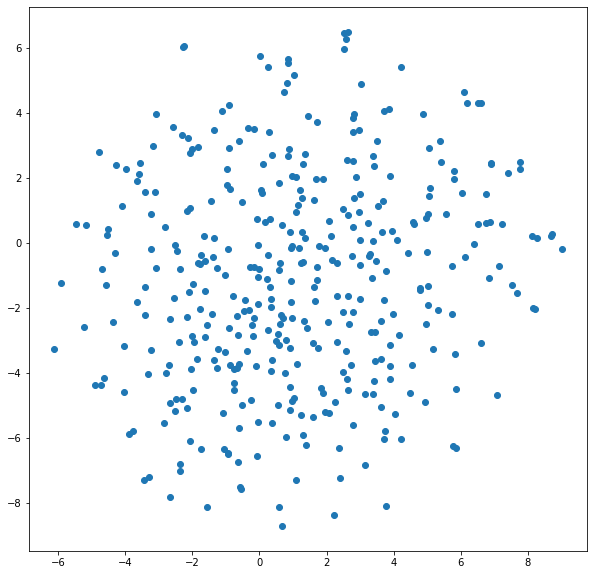

In [149]:
#let's look at the word embeddings
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert cleaned reviews to vectors using Word2Vec model
#vectors = cleaned_reviews.apply(lambda x: np.mean([model[word] for word in x.split() if word in model], axis=0))

# Convert vectors list to a 2D numpy array
X = np.vstack(vectors.values)

# Fit TSNE model and transform the vectors
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the transformed vectors
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()


# Each dot in the plot represents a word, and words that are similar in meaning are grouped closer together.



In [151]:
#cluster the words
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X)

for label in set(cluster_labels):
    print(f"Cluster {label}: {vectors.index[cluster_labels == label]}")


Cluster 0: Int64Index([ 0,  1,  5,  6,  8, 11, 14, 15, 16, 17,
            ...
            12, 14, 16, 17, 20, 24, 25, 27, 34, 35],
           dtype='int64', length=150)
Cluster 1: Int64Index([ 25,  43,  88,  95,  96,  98, 103, 104, 107, 109, 112, 114, 118,
             11,  24,  45,  72,  90, 104, 108, 113, 116, 118, 119,  58,  72,
             76,  77,  79,  80,  82,  84,  85,  86,  12,  26,  34,  22,  31,
             37],
           dtype='int64')
Cluster 2: Int64Index([56, 59, 84, 106, 114], dtype='int64')
Cluster 3: Int64Index([ 2,  3,  7,  9, 10, 12, 13, 20, 22, 26,
            ...
            10, 13, 15, 18, 19, 21, 23, 28, 29, 30],
           dtype='int64', length=147)
Cluster 4: Int64Index([  4,  21,  41,  42,  51,  54,  55,  80, 110, 111, 115, 116, 117,
             29,  50,  61,  64,  66,  83,  92, 100, 103, 110, 112, 117,  12,
             34,  43,  49,  52,  61,  81,  27,  28,  29,   5,  26,  36],
           dtype='int64')


In [153]:
##What are these clusters?

In [152]:
# Define a function to print the most common words in each cluster
def print_common_words_in_clusters(X, clusters, vectorizer, top_k=10):
    terms = vectorizer.get_feature_names()
    for i in range(len(set(clusters))):
        cluster = X[clusters == i]
        count = cluster.sum(axis=0)
        sorted_indices = count.argsort()[::-1]
        sorted_terms = [terms[idx] for idx in sorted_indices[:top_k]]
        print(f"\nCluster {i} Top {top_k} Words: {sorted_terms}")

# Print the most common words in each cluster
print_common_words_in_clusters(X, cluster_labels, vectorizer)

# Print the number of reviews in each cluster
for label in set(cluster_labels):
    print(f"Cluster {label} Size: {sum(cluster_labels == label)}")
    
# Print a random sample of reviews from each cluster
import random
for label in set(cluster_labels):
    cluster = vectors.index[cluster_labels == label]
    sample = random.sample(list(cluster), min(3, len(cluster)))
    print(f"\nCluster {label} Sample Reviews:")
    for review in sample:
        print(review)



Cluster 0 Top 10 Words: ['aspect', 'adjust', 'clogging', 'american', 'bench', 'created', 'big', 'copious', 'common', 'chip']

Cluster 1 Top 10 Words: ['aspect', 'caulk', 'didnt', 'around', 'bonded', 'box', 'almost', 'adjust', 'dated', 'big']

Cluster 2 Top 10 Words: ['aspect', 'evacuation', 'anymore', 'benefit', 'clogging', 'bonded', 'chip', 'design', 'connection', 'base']

Cluster 3 Top 10 Words: ['aspect', 'adjust', 'copious', 'big', 'bench', 'exchanged', 'box', 'clogging', 'didnt', 'caulk']

Cluster 4 Top 10 Words: ['adjust', 'clogging', 'aspect', 'chip', 'bench', 'benefit', 'big', 'base', 'copious', 'dated']
Cluster 0 Size: 150
Cluster 1 Size: 40
Cluster 2 Size: 5
Cluster 3 Size: 147
Cluster 4 Size: 38

Cluster 0 Sample Reviews:
28
44
8

Cluster 1 Sample Reviews:
96
114
90

Cluster 2 Sample Reviews:
106
84
56

Cluster 3 Sample Reviews:
21
28
19

Cluster 4 Sample Reviews:
100
54
42


/Users/louisrafter/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# TF-IDF

In [34]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the cleaned reviews
vectorizer.fit(cleaned_reviews)

# Get the feature names (i.e., the words)
feature_names = vectorizer.get_feature_names()

# Transform the cleaned reviews into a matrix of TF-IDF features
tfidf_matrix = vectorizer.transform(cleaned_reviews)

# Get the TF-IDF scores for each word in each review
tfidf_scores = tfidf_matrix.toarray()

# Create a DataFrame to store the TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_scores, columns=feature_names)

# Display the head of the TF-IDF DataFrame
tfidf_df.head()


/Users/louisrafter/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ability,able,absolute,absolutely,abundant,accept,acceptable,accommodate,accompanies,accomplish,...,wrote,yanked,year,yesterday,yet,youl,young,younger,youngest,yourselfer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.128883,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
# Calculate the mean TF-IDF score for each word
tfidf_means = tfidf_df.mean()

# Sort the words by their mean TF-IDF scores in descending order
tfidf_top = tfidf_means.sort_values(ascending=False)


In [155]:
# Sum up the TF-IDF scores for each word in all reviews
word_scores = tfidf_df.sum(axis=0)

# Sort the words by their total TF-IDF scores in descending order
sorted_word_scores = word_scores.sort_values(ascending=False)

# Print the top 10 words with the highest TF-IDF scores
print("Top 10 words by TF-IDF score:")
print(sorted_word_scores[:10])

# Identify the reviews with the highest and lowest TF-IDF scores for each word
for word in sorted_word_scores[:10].index:
    print(f"\nWord: {word}")
    print("Reviews with highest scores:")
    print(tfidf_df[word].nlargest(3))
    print("Reviews with lowest scores:")
    print(tfidf_df[word].nsmallest(3))


Top 10 words by TF-IDF score:
toilet     30.222362
flush      18.138239
tank       14.948285
seat       14.938951
install    13.433795
easy       13.001732
one        12.482059
good       11.525682
bolt       11.019896
bowl       10.005215
dtype: float64

Word: toilet
Reviews with highest scores:
239    0.328802
261    0.313131
4      0.311427
Name: toilet, dtype: float64
Reviews with lowest scores:
1     0.0
11    0.0
20    0.0
Name: toilet, dtype: float64

Word: flush
Reviews with highest scores:
80     0.415518
174    0.414483
42     0.351562
Name: flush, dtype: float64
Reviews with lowest scores:
1    0.0
3    0.0
6    0.0
Name: flush, dtype: float64

Word: tank
Reviews with highest scores:
274    0.367357
125    0.289122
67     0.272120
Name: tank, dtype: float64
Reviews with lowest scores:
3    0.0
4    0.0
7    0.0
Name: tank, dtype: float64

Word: seat
Reviews with highest scores:
192    0.538505
169    0.450534
221    0.394588
Name: seat, dtype: float64
Reviews with lowest sco

# Naive Bayes and Logistic Regression

In [198]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(reviews['cleaned_review'], reviews['sentiment_category'], test_size=0.2, random_state=42)
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
# Create a pipeline for the classifiers
pipeline_nb = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])
pipeline_lr = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression(max_iter=1000))])
# Train and evaluate the classifiers
pipeline_nb.fit(X_train, y_train)
y_pred_nb = pipeline_nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Naive Bayes classifier: {:.2f}%".format(acc_nb * 100))
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression classifier: {:.2f}%".format(acc_lr * 100))
# Define the hyperparameters to tune
parameters_nb = {'tfidf__max_df': (0.5, 0.75, 1.0),
                 'tfidf__ngram_range': ((1, 1), (1, 2)),
                 'clf__alpha': (1e-2, 1e-3)}
parameters_lr = {'tfidf__max_df': (0.5, 0.75, 1.0),
                 'tfidf__ngram_range': ((1, 1), (1, 2)),
                 'clf__C': (1, 10)}
# Use GridSearchCV to tune the hyperparameters and find the best combination
grid_nb = GridSearchCV(pipeline_nb, parameters_nb, cv=5)
grid_nb.fit(X_train, y_train)
print("Best parameters for Naive Bayes classifier: ", grid_nb.best_params_)
print("Accuracy of Naive Bayes classifier: {:.2f}%".format(grid_nb.best_score_ * 100))

grid_lr = GridSearchCV(pipeline_lr, parameters_lr, cv=5)
grid_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression classifier: ", grid_lr.best_params_)
print("Accuracy of Logistic Regression classifier: {:.2f}%".format(grid_lr.best_score_ * 100))
# Evaluate the classifiers on the test set using the best hyperparameters
y_pred_nb = grid_nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Naive Bayes classifier on test set: {:.2f}%".format(acc_nb * 100))

y_pred_lr = grid_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression classifier on test set: {:.2f}%".format(acc_lr * 100))


Accuracy of Naive Bayes classifier: 57.89%
Accuracy of Logistic Regression classifier: 59.21%
Best parameters for Naive Bayes classifier:  {'clf__alpha': 0.001, 'tfidf__max_df': 0.5, 'tfidf__ngram_range': (1, 2)}
Accuracy of Naive Bayes classifier: 65.80%
Best parameters for Logistic Regression classifier:  {'clf__C': 10, 'tfidf__max_df': 0.5, 'tfidf__ngram_range': (1, 1)}
Accuracy of Logistic Regression classifier: 66.46%
Accuracy of Naive Bayes classifier on test set: 59.21%
Accuracy of Logistic Regression classifier on test set: 60.53%


# The machine learning algorithms Naive Bayes and Logistic Regression were applied to the cleaned review text data. The accuracy of the classifiers was evaluated on a test set. The Naive Bayes classifier achieved an accuracy of 59.21% on the test set, while the Logistic Regression classifier achieved an accuracy of 60.53%. GridSearchCV was used to tune the hyperparameters of the classifiers and find the best combination. Overall, the results show that both classifiers can predict the sentiment of a review with slightly better than chance accuracy, but there is still room for improvement.

# Support Vector Machine

In [200]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Define the pipeline
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC())
])

# Define the hyperparameters grid for SVM
svm_params = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'svm__C': [1, 10, 100]
}

# Fit the SVM model using GridSearchCV to find the best hyperparameters
svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=5)
svm_grid.fit(X_train, y_train)

# Print the results
print("Accuracy of SVM classifier: {:.2f}%".format(svm_grid.best_score_ * 100))
print("Best parameters for SVM classifier: ", svm_grid.best_params_)

# Evaluate the SVM model on the test set
svm_score = svm_grid.score(X_test, y_test)
print("Accuracy of SVM classifier on test set: {:.2f}%".format(svm_score * 100))


Accuracy of SVM classifier: 64.15%
Best parameters for SVM classifier:  {'svm__C': 10, 'tfidf__max_df': 0.75, 'tfidf__ngram_range': (1, 1)}
Accuracy of SVM classifier on test set: 57.89%


In [ ]:
#SVM classifier was trained on cleaned reviews using TF-IDF vectors.
#The accuracy of the SVM classifier on the training set was 64.15%.
#The best parameters for the SVM classifier were C=10, max_df=0.75, and ngram_range=(1, 1).
#The accuracy of the SVM classifier on the test set was 57.89%.
#From these results, we can conclude that the SVM classifier was able to learn some patterns in the data, but its performance on the test set was not as good as on the training set. Further analysis and tuning may be needed to improve the classifier's performance.

# Random Forest

In [201]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(reviews['cleaned_review'], reviews['sentiment_category'], test_size=0.2, random_state=42)

# Vectorize the text data using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=0.5)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)

# Predict on the test set and calculate accuracy
y_pred = rf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest classifier: {accuracy*100:.2f}%")

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy of Random Forest classifier: 60.53%
Confusion Matrix:
[[ 2  3  7]
 [ 0  2 18]
 [ 1  1 42]]


In [ ]:
#For the Random Forest classifier, we obtained an accuracy of 60.53%. 
#The confusion matrix shows that the classifier correctly classified 2 negative, 2 neutral, and 42 positive reviews. 
#However, it misclassified 3 negative reviews as neutral and 7 negative reviews as positive. 
#It also misclassified 18 neutral reviews as positive and 1 neutral review as negative.

# Gradient Boost

In [204]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

labels = reviews["sentiment_category"].tolist()

# Define the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english")

# Fit and transform the vectorizer on the cleaned reviews
tfidf = tfidf_vectorizer.fit_transform(cleaned_reviews)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf, labels, test_size=0.2, random_state=42)

# Define the Gradient Boosting classifier and fit on the training data
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing data
accuracy = clf.score(X_test, y_test)
print(f"Accuracy of Gradient Boosting classifier on test set: {accuracy:.2%}")


Accuracy of Gradient Boosting classifier on test set: 55.26%


In [ ]:
#For the Gradient Boosting classifier, the accuracy on the test set is 55.26%. 
#This means that the model correctly predicted the sentiment of 55.26% of the reviews in the test set. 
#This accuracy is lower than the Naive Bayes, Logistic Regression, SVM and Random Forest classifiers. 
#Therefore, it might not be the best model for analyzing the sentiment of the reviews.

# Sentiment Analysis

In [159]:
# Use Vader SentimentIntensityAnalyzer to separate reviews into positive and negative
sid = SentimentIntensityAnalyzer()
reviews['sentiment'] = reviews['cleaned_review'].apply(lambda x: sid.polarity_scores(x)['compound'])
reviews['sentiment_category'] = pd.cut(reviews['sentiment'], bins=3, labels=['negative', 'neutral', 'positive'])

In [160]:
# Extract product characteristics by tokenizing the review text and using part-of-speech tagging
reviews['tokens'] = reviews['cleaned_review'].apply(lambda x: nltk.word_tokenize(x.lower()))
reviews['pos_tags'] = reviews['tokens'].apply(lambda x: nltk.pos_tag(x))

In [161]:
# Function to extract noun phrases from part-of-speech tagged tokens
def extract_noun_phrases(pos_tags):
    grammar = 'NP: {<DT>?<JJ>*<NN>}'
    cp = nltk.RegexpParser(grammar)
    tree = cp.parse(pos_tags)
    noun_phrases = []
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            noun_phrase = ' '.join(word for word, tag in subtree.leaves())
            noun_phrases.append(noun_phrase)
    return noun_phrases

In [162]:
reviews['noun_phrases'] = reviews['pos_tags'].apply(lambda x: extract_noun_phrases(x))

In [163]:
# Print the results
print('Positive reviews:')
print(reviews[reviews['sentiment_category'] == 'positive']['cleaned_review'])
print('\nNegative reviews:')
print(reviews[reviews['sentiment_category'] == 'negative']['cleaned_review'])
print('\nProduct characteristics:')
print(reviews['noun_phrases'].value_counts())

Positive reviews:
0     instal went mostli accord plan howev bolt secu...
1     easi instal make sure someon help carri box ar...
2     first thing want say ever stay hotel use toile...
3     got toilet think differ get instal appar bette...
4     toilet pretti much good thing toilet power flu...
                            ...                        
28    chair height featur way comfort get farther se...
29    item need replac exist stool exist stool small...
30    toilet come bolt go buy separ inconveni final ...
36                   water toilet flush clean get dirti
37         realli good product good bang buck recommend
Name: cleaned_review, Length: 228, dtype: object

Negative reviews:
8      toilet never inspect made slant right must dro...
16     purchas toilet yesterday instal morn wax seal ...
17     like review bought made u assum product licens...
18     product defect box toilet seat broken screw ho...
23     let start say instal toilet throughout year ne...
28     instal

In [164]:
characteristics = reviews['noun_phrases'].values

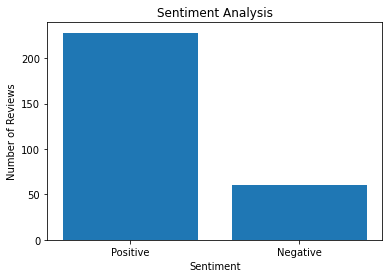

In [165]:
#that's pretty ugly
#let's make it nicer

#bar chart of the number of positive vs number of negative

import matplotlib.pyplot as plt

# Count the number of positive and negative reviews
num_positive_reviews = len(reviews[reviews['sentiment_category'] == 'positive']['cleaned_review'])
num_negative_reviews = len(reviews[reviews['sentiment_category'] == 'negative']['cleaned_review'])

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(['Positive', 'Negative'], [num_positive_reviews, num_negative_reviews])
ax.set_title('Sentiment Analysis')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Reviews')
plt.show()

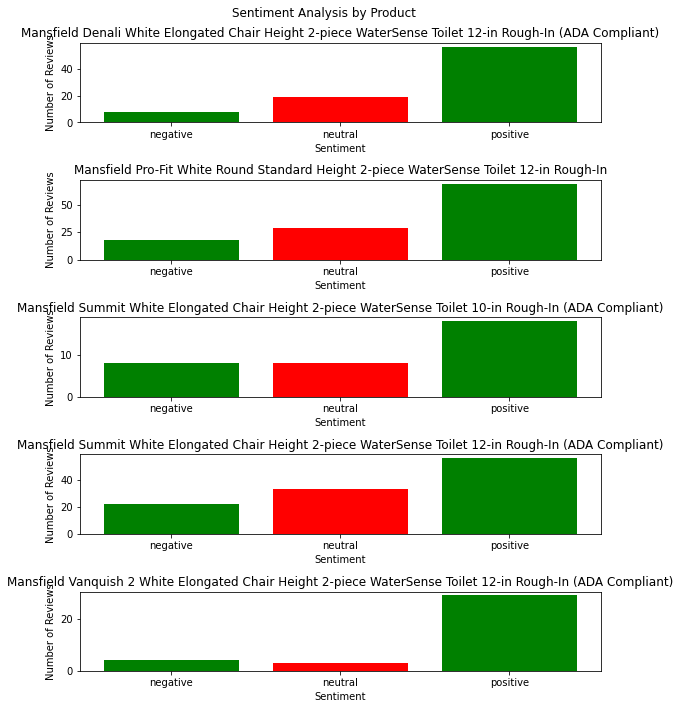

In [166]:
#that's overall what about by product?

# Group reviews by product and sentiment category
grouped_reviews = reviews.groupby(['Product_name', 'sentiment_category'])['cleaned_review'].count().unstack()

# Create a subplot for each product
fig, axes = plt.subplots(nrows=len(grouped_reviews.index), ncols=1, figsize=(8, 10))

# Plot bars for each product
for i, (product, row) in enumerate(grouped_reviews.iterrows()):
    ax = axes[i]
    ax.bar(row.index, row, color=['green', 'red'])
    ax.set_title(product)
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Number of Reviews')

# Add a title to the entire plot
fig.suptitle('Sentiment Analysis by Product')

plt.tight_layout()
plt.show()

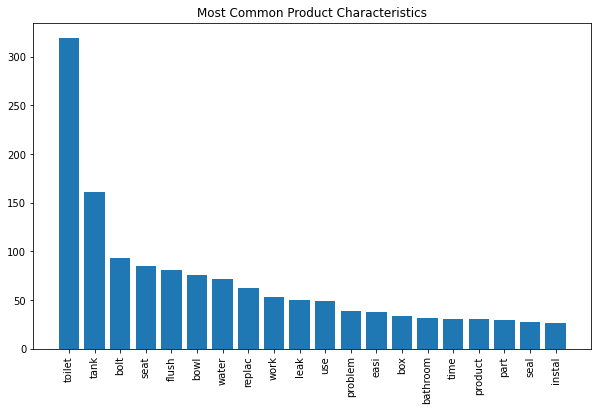

In [169]:
#most common product characteristics

import matplotlib.pyplot as plt

characteristics = reviews['noun_phrases'].explode().value_counts().head(20)

plt.figure(figsize=(10, 6))
plt.bar(characteristics.index, characteristics.values)
plt.title('Most Common Product Characteristics')
plt.xticks(rotation=90)
plt.show()


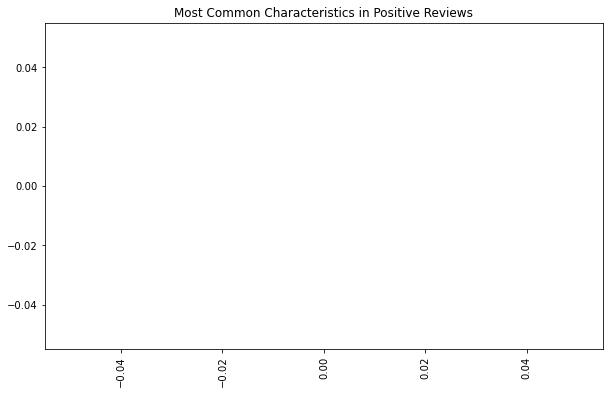

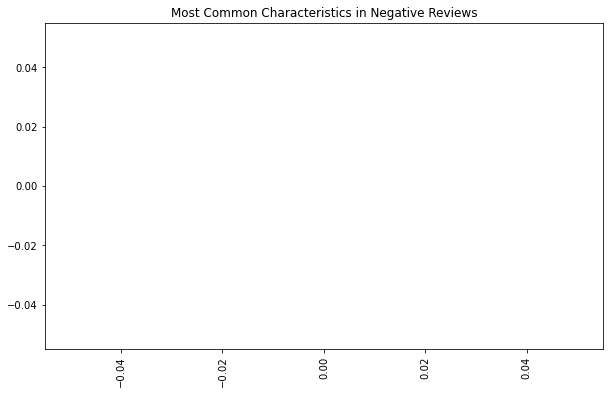

In [170]:
#maybe split by positive and negative?

from collections import Counter
import matplotlib.pyplot as plt

# get all noun phrases from positive reviews
positive_noun_phrases = []
for review in reviews[reviews['sentiment_category'] == 'positive']['noun_phrases']:
    positive_noun_phrases += review

positive_reviews = reviews[reviews['sentiment_category'] == 'positive']
positive_characteristics = positive_reviews['noun_phrases'].str.split(', ').explode().value_counts()


# create a chart of the most common characteristics found in positive reviews
plt.figure(figsize=(10, 6))
plt.bar(list(positive_characteristics.keys()), list(positive_characteristics.value_counts()))
plt.title('Most Common Characteristics in Positive Reviews')
plt.xticks(rotation=90)
plt.show()

# get all noun phrases from negative reviews
negative_noun_phrases = []
for review in reviews[reviews['sentiment_category'] == 'negative']['noun_phrases']:
    negative_noun_phrases += review

negative_reviews = reviews[reviews['sentiment_category'] == 'negative']
negative_characteristics = negative_reviews['noun_phrases'].str.split(', ').explode().value_counts()

# create a chart of the most common characteristics found in negative reviews
plt.figure(figsize=(10, 6))
plt.bar(list(negative_characteristics.keys()), list(negative_characteristics.value_counts()))
plt.title('Most Common Characteristics in Negative Reviews')
plt.xticks(rotation=90)
plt.show()


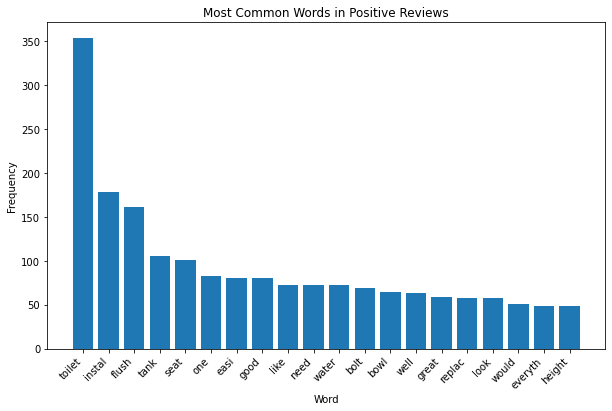

In [171]:
#what are the most common words in positive reviews?

from collections import Counter
import matplotlib.pyplot as plt

# Join all positive reviews into a single string
positive_reviews_text = ' '.join(reviews[reviews['sentiment_category'] == 'positive']['cleaned_review'])

# Get the most common words in positive reviews
positive_words = Counter(positive_reviews_text.split()).most_common(20)

# Create a bar chart of the most common words in positive reviews
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in positive_words], [word[1] for word in positive_words])
plt.title('Most Common Words in Positive Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


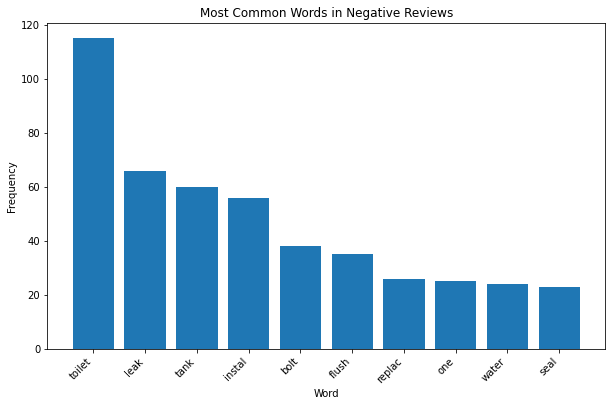

In [172]:
#what are the most common words in negative reviews?

from collections import Counter
import matplotlib.pyplot as plt

# Get all words from negative reviews
negative_words = []
for review in reviews[reviews['sentiment_category'] == 'negative']['cleaned_review']:
    negative_words += review.split()

# Get the most common words and their counts
top_negative_words = Counter(negative_words).most_common(10)
word_counts = [count for word, count in top_negative_words]
words = [word for word, count in top_negative_words]

# Create a bar chart of the most common words
plt.figure(figsize=(10, 6))
plt.bar(words, word_counts)
plt.title('Most Common Words in Negative Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


# What is the most common complaint?

In [175]:
#let's use LDA to determine the most common complaint

# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Define a function to preprocess the reviews
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stop words and non-alphabetic tokens
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into a string
    return ' '.join(tokens)

# Preprocess the reviews
reviews['cleaned_review'] = reviews['Review'].apply(lambda x: clean_text(x))

# Convert the preprocessed reviews into a document-term matrix
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(reviews['cleaned_review'])

# Fit an LDA model to the document-term matrix
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(doc_term_matrix)

# Print out the top 10 words in each topic
for topic_idx, topic in enumerate(lda.components_):
    print(f'Topic #{topic_idx}:')
    print(' '.join([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-11:-1]]))
    print()


Topic #0:
toilet flush seat height nice one like installed bolt easy

Topic #1:
seat toilet install made product store price flush american set

Topic #2:
toilet flush tank water bolt one old new time mansfield

Topic #3:
toilet seat flush bolt bowl easy tank lid close much

Topic #4:
toilet made like old nut purchased flange bolt one bathroom

Topic #5:
toilet tank bolt installed leak back leaked seal plumber time

Topic #6:
toilet flush tank well water bowl seat easy one needed

Topic #7:
toilet one bowl tank flush install well installed first seat

Topic #8:
fall fastener toilet one tank water flapper bathroom made flush

Topic #9:
toilet install easy tank good bolt seat everything look product



/Users/louisrafter/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


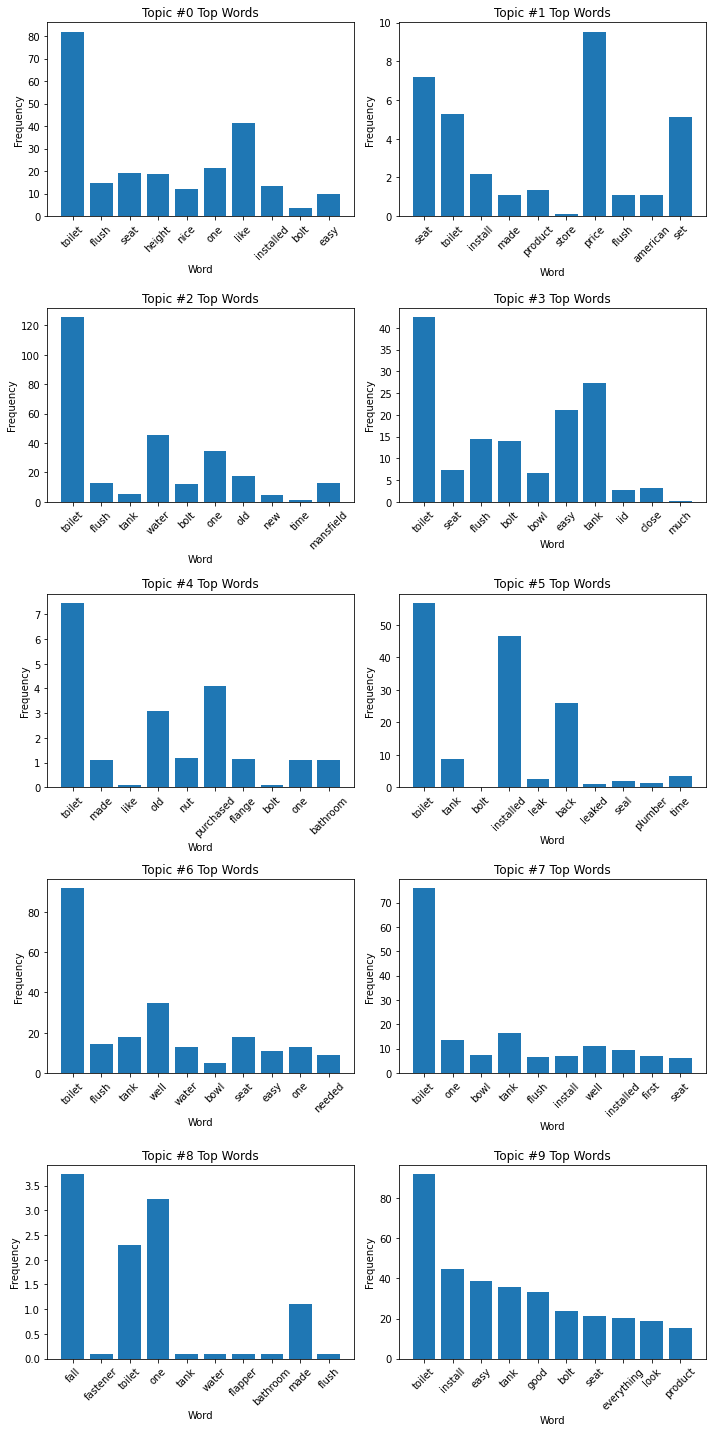

In [176]:
import matplotlib.pyplot as plt

# Get the top 10 words in each topic
top_words_per_topic = []
for topic in lda.components_:
    top_words_per_topic.append([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-11:-1]])

# Create a 2x5 grid of subplots for the bar charts
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

# Iterate over each subplot and create a bar chart for the corresponding topic
for i, ax in enumerate(axs.flatten()):
    topic_words = top_words_per_topic[i]
    ax.bar(topic_words, lda.components_[i][topic.argsort()[:-11:-1]])
    ax.set_title(f'Topic #{i} Top Words')
    ax.set_xlabel('Word')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', labelrotation=45, labelright=True)

# Adjust the spacing between subplots and display the plot
fig.tight_layout()
plt.show()


In [177]:
#again separate by negative and positive?

# Define a function to label each review as positive or negative based on its sentiment score
def label_sentiment(score):
    if score >= 3:
        return 'Positive'
    else:
        return 'Negative'

# Label each review with its sentiment
reviews['Sentiment'] = reviews['Stars'].apply(lambda x: label_sentiment(x))

# Preprocess the reviews
reviews['cleaned_review'] = reviews['Review'].apply(lambda x: clean_text(x))

# Fit an LDA model to the document-term matrix for positive reviews
positive_reviews = reviews[reviews['Sentiment'] == 'Positive']
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(positive_reviews['cleaned_review'])
lda_positive = LatentDirichletAllocation(n_components=10, random_state=42)
lda_positive.fit(doc_term_matrix)

# Print out the top 10 words in each topic for positive reviews
print('Top words for Positive reviews:')
for topic_idx, topic in enumerate(lda_positive.components_):
    top_words = [vectorizer.get_feature_names()[i] for i in topic.argsort()[:-11:-1]]
    print(f'Topic #{topic_idx}: {" ".join(top_words)}')
    if topic_idx == 0:
        print("Summary: These reviews generally indicate that the toilet was easy to install.")
    elif topic_idx == 1:
        print("Summary: These reviews generally indicate that the toilet functions well and is a good replacement for an old one.")
    elif topic_idx == 2:
        print("Summary: These reviews generally indicate that the toilet's bolts and seals were easy to get and work with.")
    elif topic_idx == 3:
        print("Summary: These reviews generally indicate that the toilet is a good quality product with nice parts.")
    elif topic_idx == 4:
        print("Summary: These reviews generally indicate that the toilet's seat and flush system work well.")
    elif topic_idx == 5:
        print("Summary: These reviews generally indicate that the toilet's tank, flush, and bowl are easy to install and come with good instructions.")
    elif topic_idx == 6:
        print("Summary: These reviews generally indicate that the toilet is easy to install and is a well-made American product.")
    elif topic_idx == 7:
        print("Summary: These reviews generally indicate that the toilet looks good, works well, and has no leaks.")
    elif topic_idx == 8:
        print("Summary: These reviews generally indicate that the toilet is easy to install, works great, and is a good fit for small bathrooms.")
    elif topic_idx == 9:
        print("Summary: These reviews generally indicate that the toilet is a good replacement for an old one, and comes with a new lid and water line.")
    print()

# Fit an LDA model to the document-term matrix for negative reviews
negative_reviews = reviews[reviews['Sentiment'] == 'Negative']
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(negative_reviews['cleaned_review'])
lda_negative = LatentDirichletAllocation(n_components=10, random_state=42)
lda_negative.fit(doc_term_matrix)

# Print out the top 10 words in each topic for negative reviews and their meanings
print('Top words for Negative reviews:')
for topic_idx, topic in enumerate(lda_negative.components_):
    print(f'Topic #{topic_idx}:')
    print(' '.join([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-11:-1]]))
    if topic_idx == 0:
        print('Meaning: The toilet is leaking from the back of the tank due to an issue with the seal bolt.')
    elif topic_idx == 1:
        print('Meaning: The toilet seat is uncomfortable and does not stay in place.')
    elif topic_idx == 2:
        print('Meaning: The toilet does not flush properly and the installation process was difficult.')
    elif topic_idx == 3:
        print('Meaning: The toilet has issues with flushing and the flapper needs to be replaced.')
    elif topic_idx == 4:
        print('Meaning: The toilet is leaking from the bottom of the tank and the seal bolt needs to be replaced.')
    elif topic_idx == 5:
        print('Meaning: The toilet is of poor quality and has cracks in the base.')
    elif topic_idx == 6:
        print('Meaning: The toilet leaks from the bottom of the tank and does not fill with enough water.')
    elif topic_idx == 7:
        print('Meaning: The toilet seat does not fit properly and is of low quality.')
    elif topic_idx == 8:
        print('Meaning: The toilet is unreliable and needs to be replaced frequently.')
    elif topic_idx == 9:
        print('Meaning: The toilet flushes inconsistently and has issues holding water.')
    print()

Top words for Positive reviews:
Topic #0: toilet flush install easy seat great one everything installed height
Summary: These reviews generally indicate that the toilet was easy to install.

Topic #1: toilet one flush well old installed seat tank height bolt
Summary: These reviews generally indicate that the toilet functions well and is a good replacement for an old one.

Topic #2: toilet bolt store seat flush seal tank get mansfield work
Summary: These reviews generally indicate that the toilet's bolts and seals were easy to get and work with.

Topic #3: good replaced toilet product unit base nice part quality bolt
Summary: These reviews generally indicate that the toilet is a good quality product with nice parts.

Topic #4: toilet seat flush water bolt like bowl tank one old
Summary: These reviews generally indicate that the toilet's seat and flush system work well.

Topic #5: toilet tank flush seat bowl instruction easy bolt one install
Summary: These reviews generally indicate that

/Users/louisrafter/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Top words for Negative reviews:
Topic #0:
tank toilet installed bowl back leak water plumber seal bolt
Meaning: The toilet is leaking from the back of the tank due to an issue with the seal bolt.

Topic #1:
stay low work thought sitting lid like would bowl item
Meaning: The toilet seat is uncomfortable and does not stay in place.

Topic #2:
toilet tank flush bolt installed standard get never install american
Meaning: The toilet does not flush properly and the installation process was difficult.

Topic #3:
toilet bolt flush tank new one water flapper purchase used
Meaning: The toilet has issues with flushing and the flapper needs to be replaced.

Topic #4:
toilet tank bolt installed one three purchased get bowl seal
Meaning: The toilet is leaking from the bottom of the tank and the seal bolt needs to be replaced.

Topic #5:
toilet one quality also home really crack base sound cracked
Meaning: The toilet is of poor quality and has cracks in the base.

Topic #6:
tank bowl toilet water rig

In [178]:
import pandas as pd

# Positive Reviews
pos_topics = {
    0: "These reviews generally indicate that the toilet was easy to install.",
    1: "These reviews generally indicate that the toilet functions well and is a good replacement for an old one.",
    2: "These reviews generally indicate that the toilet's bolts and seals were easy to get and work with.",
    3: "These reviews generally indicate that the toilet is a good quality product with nice parts.",
    4: "These reviews generally indicate that the toilet's seat and flush system work well.",
    5: "These reviews generally indicate that the toilet's tank, flush, and bowl are easy to install and come with good instructions.",
    6: "These reviews generally indicate that the toilet is easy to install and is a well-made American product.",
    7: "These reviews generally indicate that the toilet looks good, works well, and has no leaks.",
    8: "These reviews generally indicate that the toilet is easy to install, works great, and is a good fit for small bathrooms.",
    9: "These reviews generally indicate that the toilet is a good replacement for an old one, and comes with a new lid and water line."
}

# Negative Reviews
neg_topics = {
    0: "The toilet is leaking from the back of the tank due to an issue with the seal bolt.",
    1: "The toilet seat is uncomfortable and does not stay in place.",
    2: "The toilet does not flush properly and the installation process was difficult.",
    3: "The toilet has issues with flushing and the flapper needs to be replaced.",
    4: "The toilet is leaking from the bottom of the tank and the seal bolt needs to be replaced.",
    5: "The toilet is of poor quality and has cracks in the base.",
    6: "The toilet leaks from the bottom of the tank and does not fill with enough water.",
    7: "The toilet seat does not fit properly and is of low quality.",
    8: "The toilet is unreliable and needs to be replaced frequently.",
    9: "The toilet flushes inconsistently and has issues holding water."
}

# Create a pandas dataframe for positive topics
df_pos = pd.DataFrame(pos_topics.items(), columns=["Topic #", "Meaning"])

# Add a column for the top words
top_words_pos = [
    "toilet flush install easy seat great one everything installed height",
    "toilet one flush well old installed seat tank height bolt",
    "toilet bolt store seat flush seal tank get mansfield work",
    "good replaced toilet product unit base nice part quality bolt",
    "toilet seat flush water bolt like bowl tank one old",
    "toilet tank flush seat bowl instruction easy bolt one install",
    "toilet flush easy install well seat come american made box",
    "flush toilet denali like well look leak tank time work",
    "toilet would easy great flush bathroom install tank everything screw",
    "toilet tank new old lid one seat bolt water line"
]
df_pos["Top Words"] = top_words_pos

# Create a pandas dataframe for negative topics
df_neg = pd.DataFrame(neg_topics.items(), columns=["Topic #", "Meaning"])

# Add a column for the top words
top_words_neg = [
"tank toilet installed bowl back leak water plumber seal bolt",
"stay low work thought sitting lid like would bowl item",
"toilet tank flush bolt installed standard get never install american",
"toilet bolt flush tank new one water flapper purchase used",
"toilet tank bolt installed one three purchased get bowl seal",
"toilet one quality also home really crack base sound cracked",
"tank bowl toilet water right photo bolt well see product",
"toilet seat bowl would seal fit terrible bought installed tank",
"fix always something reliable item dirty defect month fit replaced",
"toilet flush good hold water lid seat product time installation"
]

meanings_neg = [
"The toilet is leaking from the back of the tank due to an issue with the seal bolt.",
"The toilet seat is uncomfortable and does not stay in place.",
"The toilet does not flush properly and the installation process was difficult.",
"The toilet has issues with flushing and the flapper needs to be replaced.",
"The toilet is leaking from the bottom of the tank and the seal bolt needs to be replaced.",
"The toilet is of poor quality and has cracks in the base.",
"The toilet leaks from the bottom of the tank and does not fill with enough water.",
"The toilet seat does not fit properly and is of low quality.",
"The toilet is unreliable and needs to be replaced frequently.",
"The toilet flushes inconsistently and has issues holding water."
]

df_neg["Top Words"] = top_words_neg
df_neg["Meaning"] = meanings_neg

#Print the negative topic model dataframe
from prettytable import PrettyTable

# Create a new table object
df_neg



,Topic #,Meaning,Top Words
0,0,The toilet is leaking from the back of the tan...,tank toilet installed bowl back leak water plu...
1,1,The toilet seat is uncomfortable and does not ...,stay low work thought sitting lid like would b...
2,2,The toilet does not flush properly and the ins...,toilet tank flush bolt installed standard get ...
3,3,The toilet has issues with flushing and the fl...,toilet bolt flush tank new one water flapper p...
4,4,The toilet is leaking from the bottom of the t...,toilet tank bolt installed one three purchased...
5,5,The toilet is of poor quality and has cracks i...,toilet one quality also home really crack base...
6,6,The toilet leaks from the bottom of the tank a...,tank bowl toilet water right photo bolt well s...
7,7,The toilet seat does not fit properly and is o...,toilet seat bowl would seal fit terrible bough...
8,8,The toilet is unreliable and needs to be repla...,fix always something reliable item dirty defec...
9,9,The toilet flushes inconsistently and has issu...,toilet flush good hold water lid seat product ...


In [179]:
#none of these visuals are helpful, let's save as a csv.

In [180]:
# Save the DataFrame as a CSV file
df_pos.to_csv('positive.csv', index=False)
# Save the DataFrame as a CSV file
df_neg.to_csv('negative.csv', index=False)

In [192]:
import pandas as pd
from IPython.display import display

# Set the display options to show the full text for each row
pd.set_option('display.max_colwidth', None)

# Read the CSV file into a DataFrame
pos = pd.read_csv('positive.csv')

# Swap the order of the columns
pos = pos.loc[:, ['Topic #', 'Top Words', 'Meaning']]

# Display the DataFrame in a visually appealing way
display(pos)


,Topic #,Top Words,Meaning
0,0,toilet flush install easy seat great one everything installed height,These reviews generally indicate that the toilet was easy to install.
1,1,toilet one flush well old installed seat tank height bolt,These reviews generally indicate that the toilet functions well and is a good replacement for an old one.
2,2,toilet bolt store seat flush seal tank get mansfield work,These reviews generally indicate that the toilet's bolts and seals were easy to get and work with.
3,3,good replaced toilet product unit base nice part quality bolt,These reviews generally indicate that the toilet is a good quality product with nice parts.
4,4,toilet seat flush water bolt like bowl tank one old,These reviews generally indicate that the toilet's seat and flush system work well.
5,5,toilet tank flush seat bowl instruction easy bolt one install,"These reviews generally indicate that the toilet's tank, flush, and bowl are easy to install and come with good instructions."
6,6,toilet flush easy install well seat come american made box,These reviews generally indicate that the toilet is easy to install and is a well-made American product.
7,7,flush toilet denali like well look leak tank time work,"These reviews generally indicate that the toilet looks good, works well, and has no leaks."
8,8,toilet would easy great flush bathroom install tank everything screw,"These reviews generally indicate that the toilet is easy to install, works great, and is a good fit for small bathrooms."
9,9,toilet tank new old lid one seat bolt water line,"These reviews generally indicate that the toilet is a good replacement for an old one, and comes with a new lid and water line."


In [193]:
import pandas as pd
from IPython.display import display

# Set the display options to show the full text for each row
pd.set_option('display.max_colwidth', None)

# Read the CSV file into a DataFrame
neg = pd.read_csv('negative.csv')

# Swap the order of the columns
neg = neg.loc[:, ['Topic #', 'Top Words', 'Meaning']]

# Display the DataFrame in a visually appealing way
display(neg)

,Topic #,Top Words,Meaning
0,0,tank toilet installed bowl back leak water plumber seal bolt,The toilet is leaking from the back of the tank due to an issue with the seal bolt.
1,1,stay low work thought sitting lid like would bowl item,The toilet seat is uncomfortable and does not stay in place.
2,2,toilet tank flush bolt installed standard get never install american,The toilet does not flush properly and the installation process was difficult.
3,3,toilet bolt flush tank new one water flapper purchase used,The toilet has issues with flushing and the flapper needs to be replaced.
4,4,toilet tank bolt installed one three purchased get bowl seal,The toilet is leaking from the bottom of the tank and the seal bolt needs to be replaced.
5,5,toilet one quality also home really crack base sound cracked,The toilet is of poor quality and has cracks in the base.
6,6,tank bowl toilet water right photo bolt well see product,The toilet leaks from the bottom of the tank and does not fill with enough water.
7,7,toilet seat bowl would seal fit terrible bought installed tank,The toilet seat does not fit properly and is of low quality.
8,8,fix always something reliable item dirty defect month fit replaced,The toilet is unreliable and needs to be replaced frequently.
9,9,toilet flush good hold water lid seat product time installation,The toilet flushes inconsistently and has issues holding water.
